In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as pyplot
import matplotlib.image as mpimg
import glob

%matplotlib inline


In [9]:
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('../../CarND-Advanced-Lane-Lines/camera_cal/*.jpg')

for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        #cv2.drawChessboardCorners(img, (8,6), corners, ret)
        #write_name = 'corners_found'+str(idx)+'.jpg'
        #cv2.imwrite(write_name, img)
        #cv2.imshow('img', img)
        #cv2.waitKey(500)
        print('Index = ', idx, " fname =", fname)
        
#cv2.destroyAllWindows()

Index =  1  fname = ../../CarND-Advanced-Lane-Lines/camera_cal/calibration15.jpg
Index =  2  fname = ../../CarND-Advanced-Lane-Lines/camera_cal/calibration16.jpg
Index =  3  fname = ../../CarND-Advanced-Lane-Lines/camera_cal/calibration7.jpg
Index =  4  fname = ../../CarND-Advanced-Lane-Lines/camera_cal/calibration17.jpg
Index =  5  fname = ../../CarND-Advanced-Lane-Lines/camera_cal/calibration3.jpg
Index =  6  fname = ../../CarND-Advanced-Lane-Lines/camera_cal/calibration2.jpg
Index =  7  fname = ../../CarND-Advanced-Lane-Lines/camera_cal/calibration13.jpg
Index =  8  fname = ../../CarND-Advanced-Lane-Lines/camera_cal/calibration10.jpg
Index =  9  fname = ../../CarND-Advanced-Lane-Lines/camera_cal/calibration9.jpg
Index =  11  fname = ../../CarND-Advanced-Lane-Lines/camera_cal/calibration14.jpg
Index =  12  fname = ../../CarND-Advanced-Lane-Lines/camera_cal/calibration19.jpg
Index =  14  fname = ../../CarND-Advanced-Lane-Lines/camera_cal/calibration8.jpg
Index =  15  fname = ../../Car

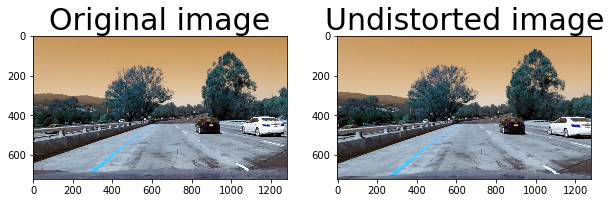

In [15]:
import pickle

test_image_fname = '../../CarND-Advanced-Lane-Lines/test_images/test1.jpg'

img = cv2.imread(test_image_fname)
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('/tmp/test_undist.jpg',dst)

dst_pickle = {}
dst_pickle["mtx"] = mtx
dst_pickle["dist"] = dist
pickle.dump(dst_pickle, open("/tmp/cam_cal_dist.p", "wb") )

f, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(10,20))

ax1.imshow(img)
ax1.set_title("Original image", fontsize=30)

ax2.imshow(dst)
ax2.set_title("Undistorted image", fontsize=30)

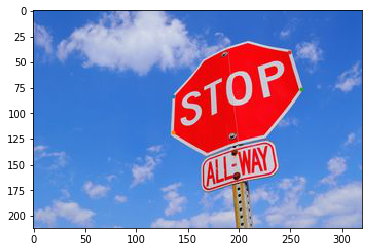

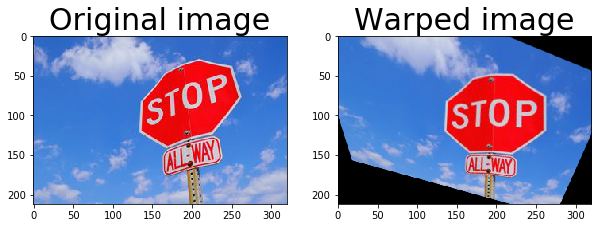

In [6]:
stop_img = mpimg.imread('../../stop1.jpg')
pyplot.imshow(stop_img)
pyplot.plot(136, 83, '.')
pyplot.plot(136, 118, '.')
pyplot.plot(260, 76, '.')
pyplot.plot(249, 40, '.')



def warp(img):
    img_size = (img.shape[1], img.shape[0])
    src = np.float32([[136, 83], [136, 118], [260, 76], [249, 40]])
    dst = np.float32([[136, 83], [136, 118], [260, 118],  [260, 77]])
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return warped


warped_img = warp(stop_img)
f, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(10,20))

ax1.imshow(stop_img)
ax1.set_title("Original image", fontsize=30)

ax2.imshow(warped_img)
ax2.set_title("Warped image", fontsize=30)
    

x= 1, y= 0
x= 0, y= 1


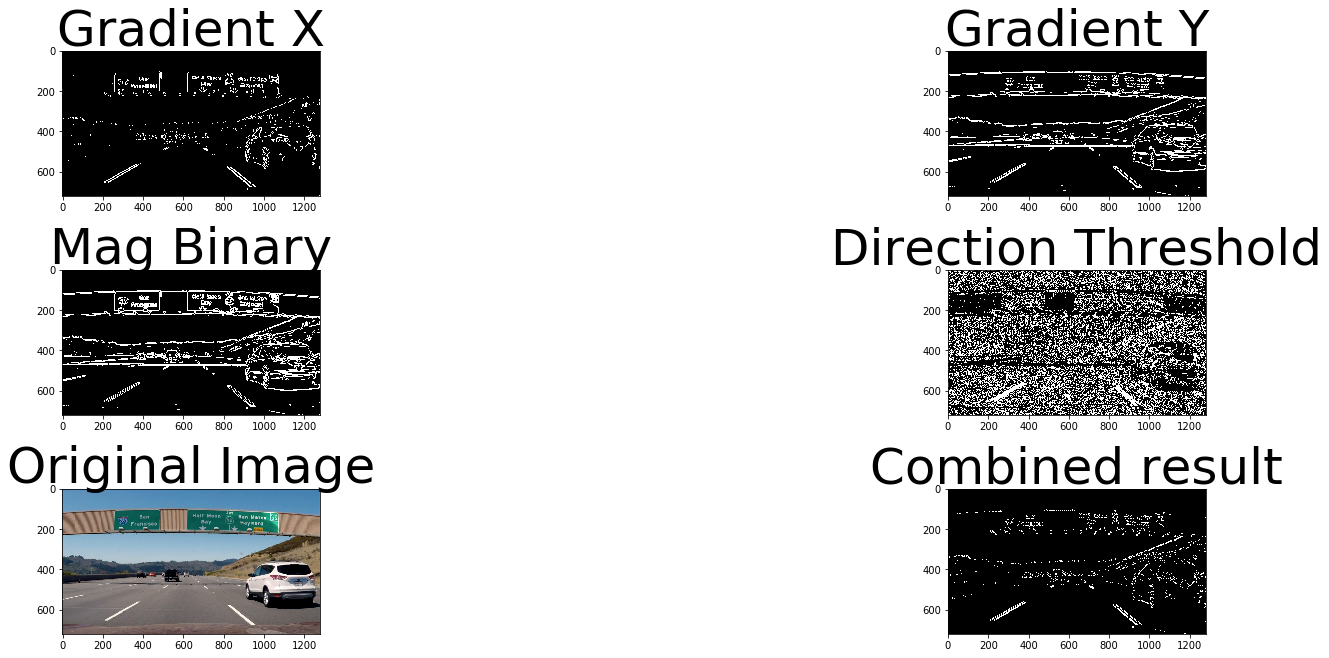

In [19]:
image = mpimg.imread('../../signs_vehicles_xygrad.png')

def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Calculate directional gradient
    # Apply threshold
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    x, y = 0, 0
    if (orient=='x'):
        x = 1
    else:
        y = 1
    print("x= {}, y= {}".format(x,y))
    sobelxy = cv2.Sobel(gray, cv2.CV_64F, x, y, ksize=sobel_kernel)
    # 3) Take the absolute value of the derivative or gradient
    abs_sobelxy = np.absolute(sobelxy)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobelxy/np.max(abs_sobelxy))
    # 5) Create a mask of 1's where the scaled gradient magnitude 
    # is > thresh_min and < thresh_max
 
    thresh_min = thresh[0]
    thresh_max = thresh[1]
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    return sxbinary 

def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Calculate gradient magnitude
    # Apply threshold
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Calculate the magnitude 
    abs_sobelxy = np.sqrt(sobelx*sobelx + sobely*sobely)
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobelxy/np.max(abs_sobelxy))
    # 5) Create a binary mask where mag thresholds are met
    thresh_min = mag_thresh[0]
    thresh_max = mag_thresh[1]
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1 
    return sxbinary 

def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Calculate gradient direction
    # Apply threshold
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Take the absolute value of the x and y gradients
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    dir_sobelxy = np.arctan2(abs_sobely, abs_sobelx)
    # 5) Create a binary mask where direction thresholds are met
    thresh_min = thresh[0]
    thresh_max = thresh[1]
    sxbinary = np.zeros_like(dir_sobelxy)
    sxbinary[(dir_sobelxy >= thresh_min) & (dir_sobelxy <= thresh_max)] = 1
    return sxbinary 

# Choose a Sobel kernel size
ksize = 15 # Choose a larger odd number to smooth gradient measurements

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(30, 100))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(30, 100))
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(30, 100))

pi_by_2 = np.pi/2
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0.7, 1.3))

combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

# Plot the result
f, all_plots = pyplot.subplots(3, 2, figsize=(24, 9))

all_plots[0,0].imshow(gradx, cmap='gray')
all_plots[0,0].set_title('Gradient X', fontsize=50)

all_plots[0,1].imshow(grady, cmap='gray')
all_plots[0,1].set_title('Gradient Y', fontsize=50)

all_plots[1,0].imshow(mag_binary, cmap='gray')
all_plots[1,0].set_title('Mag Binary', fontsize=50)

all_plots[1,1].imshow(dir_binary, cmap='gray')
all_plots[1,1].set_title('Direction Threshold', fontsize=50)

ax1 = all_plots[2,0]
ax2 = all_plots[2,1]
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(combined, cmap='gray')
ax2.set_title('Combined result', fontsize=50)
pyplot.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
pyplot.show()
